<a href="https://colab.research.google.com/github/asia281/dnn2022/blob/main/Asia_of_BML_exam_exercise_2_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given a dataframe with results of evaluation of automatic theorem proving (ATP) system on mathematical proof benchmark (1000 problems).
The ATP system relies on language model (transformer) and is parametrised by checkpoint step and softmax temperature. Other details of the system are not relevant for the exercise.

Due to unreliability of theorem proving engine some problems never load and ATP system does not have a chance to prove them.
Therefore, we define success rate as proportion
\begin{equation}
\text{succes rate} := \text{num_solved_problems} / \text{num_loaded_problems}.
\end{equation}

Due to hardware issues some experiments may fail during computation (never reach final step 1015).

The columns in dataframe are as follows:
* checkpoint_step
* temperature
* problem_number
* step
* problem solved
* problem_loaded

Exercise:
Plot succes rate of ATP system with respect to checkpoint step for each temperature. Make sure to plot only results for runs that reached the end (step 1015).

Grading:
The following three aspects will give 1/3 of the points for this task:
* Filter failed experiments
* Compute success rate properly
* Plot the results

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

!wget students.mimuw.edu.pl/~mo382777/bml-exam-atp-data.csv
df = pd.read_csv("bml-exam-atp-data.csv")
print(df)

--2023-10-19 13:52:02--  http://students.mimuw.edu.pl/~mo382777/bml-exam-atp-data.csv
Resolving students.mimuw.edu.pl (students.mimuw.edu.pl)... 193.0.96.129, 2001:6a0:5001:1::3
Connecting to students.mimuw.edu.pl (students.mimuw.edu.pl)|193.0.96.129|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://students.mimuw.edu.pl/~mo382777/bml-exam-atp-data.csv [following]
--2023-10-19 13:52:03--  https://students.mimuw.edu.pl/~mo382777/bml-exam-atp-data.csv
Connecting to students.mimuw.edu.pl (students.mimuw.edu.pl)|193.0.96.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4281224 (4.1M) [text/csv]
Saving to: ‘bml-exam-atp-data.csv’

bml-exam-atp-data.c 100%[===================>]   4.08M  4.06MB/s    in 1.0s    

2023-10-19 13:52:04 (4.06 MB/s) - ‘bml-exam-atp-data.csv’ saved [4281224/4281224]

       Unnamed: 0 experiment_id    step  problem_index  problem_loaded  \
0            1000      LAB-6487    16.0            

     checkpoint_step  temperature  problem_solved  problem_loaded    step  \
0              10000         0.10           158.0           917.0  1015.0   
1              10000         0.30           195.0           917.0  1015.0   
2              10000         0.83           230.0           917.0  1015.0   
3              10000         1.00           201.0           917.0  1015.0   
4              10000         1.20           186.0           917.0  1015.0   
..               ...          ...             ...             ...     ...   
96             99000         0.66           227.0           917.0  1015.0   
97             99000         1.00           240.0           916.0  1015.0   
98             99000         1.20           250.0           917.0  1015.0   
99             99000         1.50           253.0           917.0  1015.0   
100            99000        10.00             0.0           917.0  1015.0   

     success_rate  
0        0.172301  
1        0.212650  
2        0.2508

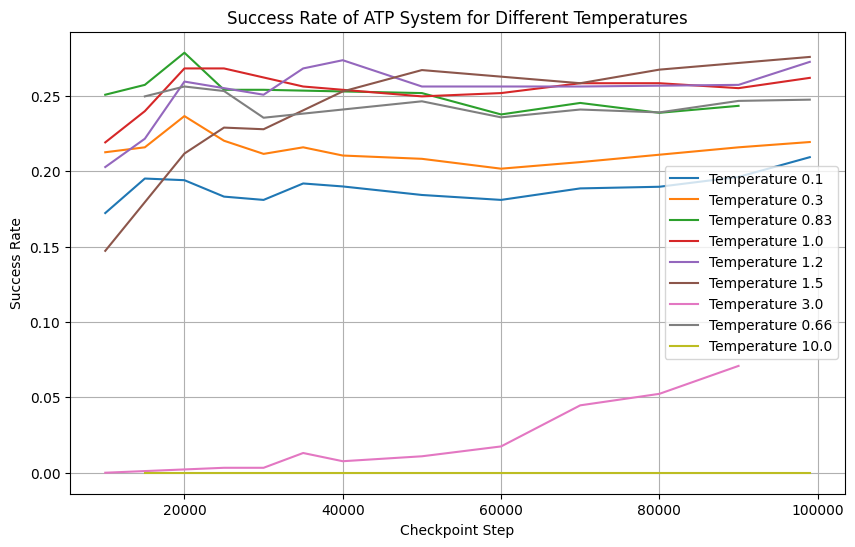

In [2]:
import matplotlib.pyplot as plt

# Step 1: Filter failed experiments
col_experiment_id = 'experiment_id'
col_problem_solved = 'problem_solved'
col_problem_loaded = 'problem_loaded'
col_step = 'step'
col_checkpoint = 'checkpoint_step'
col_temperature = 'temperature'
col_success = 'success_rate'

df_removed = df.groupby([col_checkpoint, col_temperature], as_index=False).agg({col_problem_solved: 'sum', col_problem_loaded: 'sum', col_step: 'max'})

df_removed = df_removed[df_removed[col_step] == 1015]


# Step 2: Compute success rate properly
df_removed[col_success] = df_removed[col_problem_solved] / df_removed[col_problem_loaded]
print(df_removed)

# Step 3: Plot the results
temperatures = df_removed[col_temperature].unique()
plt.figure(figsize=(10, 6))

for temperature in temperatures:
    temp_df = df_removed[df_removed[col_temperature] == temperature]
    plt.plot(temp_df[col_checkpoint], temp_df[col_success], label=f'Temperature {temperature}')

plt.xlabel('Checkpoint Step')
plt.ylabel('Success Rate')
plt.title('Success Rate of ATP System for Different Temperatures')
plt.legend()
plt.grid()
plt.show()